In [1]:
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import joblib
import time
import pickle

from multioutput_functions import *

In [2]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report

In [3]:
df = pd.read_hdf(r'C:/Users/juand/Research/h5_files/standards_230801.h5').reset_index(drop=True)
STANDARDS = {
    "WAVE": df["WAVE"].iloc[0],
    "SPT": df["SPT"],
    "FLUX": df["FLUX"],
    "UNC": df["UNCERTAINTY"],
}

singles = pd.read_hdf(r'C:/Users/juand/Research/h5_files/singles_230801.h5')
singles.drop(['OLD_SPT','MKO_J', 'MKO_H', 'MKO_K', '2MASS_J', '2MASS_H', '2MASS_KS','NAME'],axis=1,inplace=True)
wave = singles['WAVE'][0]
wavegrid_list=list(wave)
wave = np.array(wave)
wavegrid=wave

In [4]:
with open('data/SinDF_low.pickle', 'rb') as f:
        SinDF_low=pickle.load(f)
with open('data/SinDF_mid.pickle', 'rb') as f:
        SinDF_mid=pickle.load(f)
with open('data/SinDF_hig.pickle', 'rb') as f:
        SinDF_hig=pickle.load(f)

# SinDF_low.drop(['SPT','SPT_NUM'],axis=1,inplace=True)
# SinDF_mid.drop(['SPT','SPT_NUM'],axis=1,inplace=True)
# SinDF_hig.drop(['SPT','SPT_NUM'],axis=1,inplace=True)

LOW SNR

In [5]:
with open('data/BinDF_low.pickle', 'rb') as f:
        BinDF_low = pickle.load(f)
# BinDF_low.drop(['primary_type','secondary_type'],axis=1,inplace=True)

In [6]:
(len(BinDF_low)-len(SinDF_low))

-60

Text(0.5, 1.0, 'SNR Distribution')

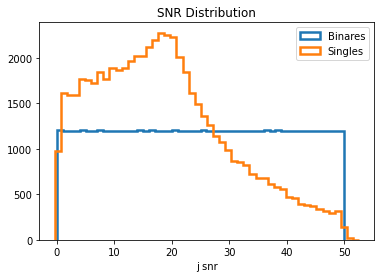

In [7]:
plt.hist(BinDF_low['J_SNR'],bins=50,lw=2.5, histtype='step', label='Binares')
plt.hist(SinDF_low['J_SNR'],bins=50,lw=2.5, histtype='step', label='Singles')
plt.legend()
plt.xlabel('j snr')
plt.title('SNR Distribution')

In [8]:
num_class=[]
for i in range(len(BinDF_low)):
    num_class.append(1)
BinDF_low["num_class"]=num_class

num_class=[]
for i in range(len(SinDF_low)):
    num_class.append(0)
SinDF_low["num_class"]=num_class

DF_low = pd.concat([SinDF_low,BinDF_low],axis=0)
DF_low.head()

,system_interpolated_flux,system_interpolated_noise,J_SNR,SNR_CLASS,WAVE,SPT,SPT_NUM,flux_0,flux_1,flux_2,...,flux_402,flux_403,flux_404,flux_405,flux_406,flux_407,flux_408,num_class,primary_type,secondary_type
0,"[0.8166701963176027, 0.8482097811383479, 0.831...","[0.0398280476027326, 0.03988600633645737, 0.03...",49.962199,low,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...",M6.0,16.0,0.816670,0.848210,0.831985,...,0.229407,0.248288,0.226373,0.223375,0.222819,0.237432,0.230642,0,NaN,NaN
1,"[0.8171684484421221, 0.887905834145889, 0.8502...","[0.049413726671411536, 0.04754254028063644, 0....",49.649830,low,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...",M6.0,16.0,0.817168,0.887906,0.850253,...,0.165280,0.231748,0.273197,0.234755,0.204666,0.227154,0.216798,0,NaN,NaN
2,"[0.7455264481462889, 0.8722296010151818, 0.841...","[0.047461200554855594, 0.04566395192476039, 0....",49.599320,low,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...",M6.0,16.0,0.745526,0.872230,0.841247,...,0.206462,0.220725,0.251875,0.204868,0.200336,0.202542,0.223587,0,NaN,NaN
3,"[0.7455571205634752, 0.837499012993456, 0.8967...","[0.04780206476224815, 0.045991908373338955, 0....",49.422898,low,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...",M6.0,16.0,0.745557,0.837499,0.896768,...,0.195994,0.202001,0.235080,0.211184,0.211033,0.192022,0.170168,0,NaN,NaN
4,"[0.8383894919270406, 0.8351111797221779, 0.845...","[0.04068860302072755, 0.040747814055414305, 0....",49.354255,low,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...",M6.0,16.0,0.838389,0.835111,0.845038,...,0.230674,0.216746,0.241708,0.224309,0.236740,0.214121,0.239716,0,NaN,NaN


In [9]:
best_model_low_G1, data_test_low_G1 = RFclassify(DF_low, wave, Group='G1')
X_test_low_G1 = data_test_low_G1['X_test']
y_test_low_G1 = data_test_low_G1['y_test']
test_preds_low_G1 = best_model_low_G1.predict(X_test_low_G1)

The raw features produce a model with precision ~0.9990
{'0': {'precision': 0.9610618523662002, 'recall': 0.999722191354595, 'f1-score': 0.9800108932461873, 'support': 17998}, '1': {'precision': 0.9990110759493671, 'recall': 0.8738754325259516, 'f1-score': 0.9322628276116649, 'support': 5780}, 'accuracy': 0.9691311296156111, 'macro avg': {'precision': 0.9800364641577837, 'recall': 0.9367988119402733, 'f1-score': 0.9561368604289261, 'support': 23778}, 'weighted avg': {'precision': 0.9702866194749017, 'recall': 0.9691311296156111, 'f1-score': 0.9684042055782783, 'support': 23778}}


Text(0.5, 0, 'wavelength ($\\mu$m)')

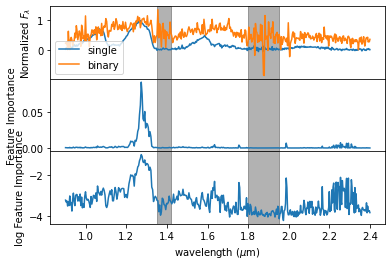

In [10]:
print("The raw features produce a model with precision ~{:.4f}".format(precision_score(y_test_low_G1, test_preds_low_G1)))
class_report_low_G1 = classification_report(y_test_low_G1,test_preds_low_G1, digits=4, output_dict=True)
print(class_report_low_G1)
fig, ax = plt.subplots(3,1,sharex=True)
ax[0].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[1].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[0].axvspan(1.80,1.95, alpha=0.3, color='k')
ax[1].axvspan(1.80,1.95, alpha=0.3, color='k')
ax[2].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[2].axvspan(1.80,1.95, alpha=0.3, color='k')
Sin_i = random.randint(0,len(SinDF_low))
Bin_i = random.randint(0,len(BinDF_low))
ax[0].plot(list(wave),list(SinDF_low.system_interpolated_flux.iloc[Sin_i]),label='single')
ax[0].plot(list(wave),list(BinDF_low.system_interpolated_flux.iloc[Bin_i]),label='binary')
ax[0].set_ylabel('Normalized $F_\\lambda$')
ax[0].legend()
ax[1].plot(list(wave), list(best_model_low_G1.feature_importances_)[:409])
ax[1].set_ylabel('Feature Importance')
ax[2].plot(list(wave), np.log10(list(best_model_low_G1.feature_importances_)[:409]))
ax[2].set_ylabel('log Feature Importance')
plt.subplots_adjust(hspace=0)
# fig.suptitle('Feature importance and M9+L6 binary template')
plt.xlabel('wavelength ($\mu$m)')

The raw features produce a model with precision ~0.9990
{'0': {'precision': 0.9610618523662002, 'recall': 0.999722191354595, 'f1-score': 0.9800108932461873, 'support': 17998}, '1': {'precision': 0.9990110759493671, 'recall': 0.8738754325259516, 'f1-score': 0.9322628276116649, 'support': 5780}, 'accuracy': 0.9691311296156111, 'macro avg': {'precision': 0.9800364641577837, 'recall': 0.9367988119402733, 'f1-score': 0.9561368604289261, 'support': 23778}, 'weighted avg': {'precision': 0.9702866194749017, 'recall': 0.9691311296156111, 'f1-score': 0.9684042055782783, 'support': 23778}}


Text(0.5, 0, 'wavelength ($\\mu$m)')

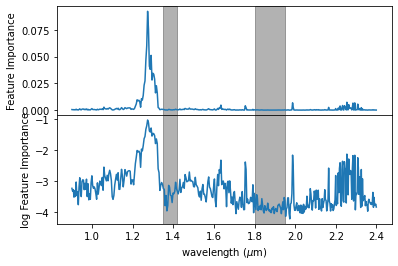

In [11]:
print("The raw features produce a model with precision ~{:.4f}".format(precision_score(y_test_low_G1, test_preds_low_G1)))
class_report_low_G1 = classification_report(y_test_low_G1,test_preds_low_G1, digits=4, output_dict=True)
print(class_report_low_G1)
fig, ax = plt.subplots(2,1,sharex=True)
ax[0].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[1].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[0].axvspan(1.80,1.95, alpha=0.3, color='k')
ax[1].axvspan(1.80,1.95, alpha=0.3, color='k')
Sin_i = random.randint(0,len(SinDF_low))
Bin_i = random.randint(0,len(BinDF_low))
ax[0].plot(list(wave), list(best_model_low_G1.feature_importances_)[:409])
ax[0].set_ylabel('Feature Importance')
ax[1].plot(list(wave), np.log10(list(best_model_low_G1.feature_importances_)[:409]))
ax[1].set_ylabel('log Feature Importance')
plt.subplots_adjust(hspace=0)
# fig.suptitle('Feature importance and M9+L6 binary template')
plt.xlabel('wavelength ($\mu$m)')

In [12]:
best_model_low_G2, data_test_low_G2 = RFclassify(DF_low, wave, Group='G2')
X_test_low_G2 = data_test_low_G2['X_test']
y_test_low_G2 = data_test_low_G2['y_test']
test_preds_low_G2 = best_model_low_G2.predict(X_test_low_G2)

The raw features produce a model with precision ~0.9898
{'0': {'precision': 0.98535140176661, 'recall': 0.9982214317474433, 'f1-score': 0.9917446644026615, 'support': 17992}, '1': {'precision': 0.9898444938114884, 'recall': 0.9211458948611931, 'f1-score': 0.9542603640813829, 'support': 3386}, 'accuracy': 0.9860136589016746, 'macro avg': {'precision': 0.9875979477890492, 'recall': 0.9596836633043182, 'f1-score': 0.9730025142420222, 'support': 21378}, 'weighted avg': {'precision': 0.9860630497067334, 'recall': 0.9860136589016746, 'f1-score': 0.985807633768933, 'support': 21378}}


Text(0.5, 0, 'wavelength ($\\mu$m)')

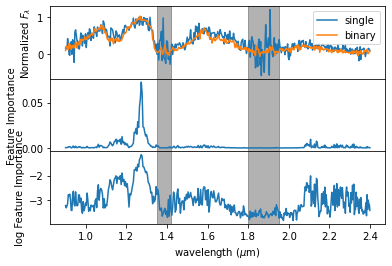

In [13]:
print("The raw features produce a model with precision ~{:.4f}".format(precision_score(y_test_low_G2, test_preds_low_G2)))
class_report_low_G2 = classification_report(y_test_low_G2,test_preds_low_G2, digits=4, output_dict=True)
print(class_report_low_G2)
fig, ax = plt.subplots(3,1,sharex=True)
ax[0].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[1].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[0].axvspan(1.80,1.95, alpha=0.3, color='k')
ax[1].axvspan(1.80,1.95, alpha=0.3, color='k')
ax[2].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[2].axvspan(1.80,1.95, alpha=0.3, color='k')
Sin_i = random.randint(0,len(SinDF_low))
Bin_i = random.randint(0,len(BinDF_low))
ax[0].plot(list(wave),list(SinDF_low.system_interpolated_flux.iloc[Sin_i]),label='single')
ax[0].plot(list(wave),list(BinDF_low.system_interpolated_flux.iloc[Bin_i]),label='binary')
ax[0].set_ylabel('Normalized $F_\\lambda$')
ax[0].legend()
ax[1].plot(list(wave), list(best_model_low_G2.feature_importances_)[:409])
ax[1].set_ylabel('Feature Importance')
ax[2].plot(list(wave), np.log10(list(best_model_low_G2.feature_importances_)[:409]))
ax[2].set_ylabel('log Feature Importance')
plt.subplots_adjust(hspace=0)
# fig.suptitle('Feature importance and M9+L6 binary template')
plt.xlabel('wavelength ($\mu$m)')

In [14]:
best_model_low_G3, data_test_low_G3 = RFclassify(DF_low, wave, Group='G3')
X_test_low_G3 = data_test_low_G3['X_test']
y_test_low_G3 = data_test_low_G3['y_test']
test_preds_low_G3 = best_model_low_G3.predict(X_test_low_G3)

The raw features produce a model with precision ~0.9693
{'0': {'precision': 0.9275683665927569, 'recall': 0.971040123797944, 'f1-score': 0.9488065665838644, 'support': 18094}, '1': {'precision': 0.9693136565940501, 'recall': 0.923454586029904, 'f1-score': 0.9458285714285715, 'support': 17924}, 'accuracy': 0.94735965350658, 'macro avg': {'precision': 0.9484410115934034, 'recall': 0.947247354913924, 'f1-score': 0.9473175690062179, 'support': 36018}, 'weighted avg': {'precision': 0.9483424955833498, 'recall': 0.94735965350658, 'f1-score': 0.9473245968697362, 'support': 36018}}


Text(0.5, 0, 'wavelength ($\\mu$m)')

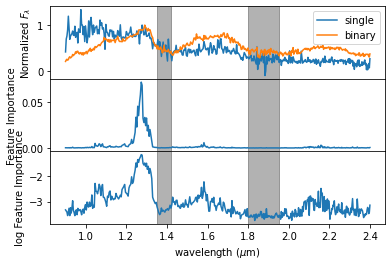

In [15]:
print("The raw features produce a model with precision ~{:.4f}".format(precision_score(y_test_low_G3, test_preds_low_G3)))
class_report_low_G3 = classification_report(y_test_low_G3,test_preds_low_G3, digits=4, output_dict=True)
print(class_report_low_G3)
fig, ax = plt.subplots(3,1,sharex=True)
ax[0].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[1].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[0].axvspan(1.80,1.95, alpha=0.3, color='k')
ax[1].axvspan(1.80,1.95, alpha=0.3, color='k')
ax[2].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[2].axvspan(1.80,1.95, alpha=0.3, color='k')
Sin_i = random.randint(0,len(SinDF_low))
Bin_i = random.randint(0,len(BinDF_low))
ax[0].plot(list(wave),list(SinDF_low.system_interpolated_flux.iloc[Sin_i]),label='single')
ax[0].plot(list(wave),list(BinDF_low.system_interpolated_flux.iloc[Bin_i]),label='binary')
ax[0].set_ylabel('Normalized $F_\\lambda$')
ax[0].legend()
ax[1].plot(list(wave), list(best_model_low_G3.feature_importances_)[:409])
ax[1].set_ylabel('Feature Importance')
ax[2].plot(list(wave), np.log10(list(best_model_low_G3.feature_importances_)[:409]))
ax[2].set_ylabel('log Feature Importance')
plt.subplots_adjust(hspace=0)
# fig.suptitle('Feature importance and M9+L6 binary template')
plt.xlabel('wavelength ($\mu$m)')

The raw features produce a model with precision ~0.9693
{'0': {'precision': 0.9275683665927569, 'recall': 0.971040123797944, 'f1-score': 0.9488065665838644, 'support': 18094}, '1': {'precision': 0.9693136565940501, 'recall': 0.923454586029904, 'f1-score': 0.9458285714285715, 'support': 17924}, 'accuracy': 0.94735965350658, 'macro avg': {'precision': 0.9484410115934034, 'recall': 0.947247354913924, 'f1-score': 0.9473175690062179, 'support': 36018}, 'weighted avg': {'precision': 0.9483424955833498, 'recall': 0.94735965350658, 'f1-score': 0.9473245968697362, 'support': 36018}}


Text(0.5, 0, 'wavelength ($\\mu$m)')

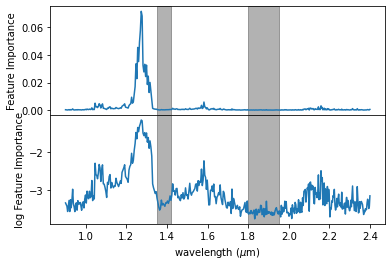

In [16]:
print("The raw features produce a model with precision ~{:.4f}".format(precision_score(y_test_low_G3, test_preds_low_G3)))
class_report_low_G3 = classification_report(y_test_low_G3,test_preds_low_G3, digits=4, output_dict=True)
print(class_report_low_G3)
fig, ax = plt.subplots(2,1,sharex=True)
ax[0].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[1].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[0].axvspan(1.80,1.95, alpha=0.3, color='k')
ax[1].axvspan(1.80,1.95, alpha=0.3, color='k')
Sin_i = random.randint(0,len(SinDF_low))
Bin_i = random.randint(0,len(BinDF_low))
ax[0].plot(list(wave), list(best_model_low_G3.feature_importances_)[:409])
ax[0].set_ylabel('Feature Importance')
ax[1].plot(list(wave), np.log10(list(best_model_low_G3.feature_importances_)[:409]))
ax[1].set_ylabel('log Feature Importance')
plt.subplots_adjust(hspace=0)
# fig.suptitle('Feature importance and M9+L6 binary template')
plt.xlabel('wavelength ($\mu$m)')

In [17]:
best_model_low_G4, data_test_low_G4 = RFclassify(DF_low, wave, Group='G4')
X_test_low_G4 = data_test_low_G4['X_test']
y_test_low_G4 = data_test_low_G4['y_test']
test_preds_low_G4 = best_model_low_G4.predict(X_test_low_G4)

The raw features produce a model with precision ~0.9810
{'0': {'precision': 0.9554642914288762, 'recall': 0.991312046926014, 'f1-score': 0.9730581205866378, 'support': 18071}, '1': {'precision': 0.9810157194679565, 'recall': 0.9066830576665177, 'f1-score': 0.9423858752468348, 'support': 8948}, 'accuracy': 0.963285095673415, 'macro avg': {'precision': 0.9682400054484164, 'recall': 0.9489975522962659, 'f1-score': 0.9577219979167363, 'support': 27019}, 'weighted avg': {'precision': 0.9639262692257483, 'recall': 0.963285095673415, 'f1-score': 0.9629002594037458, 'support': 27019}}


Text(0.5, 0, 'wavelength ($\\mu$m)')

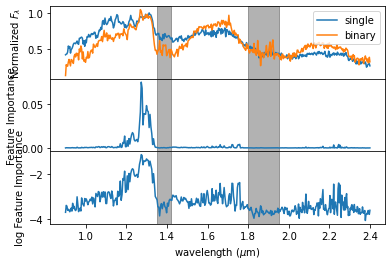

In [18]:
print("The raw features produce a model with precision ~{:.4f}".format(precision_score(y_test_low_G4, test_preds_low_G4)))
class_report_low_G4 = classification_report(y_test_low_G4,test_preds_low_G4, digits=4, output_dict=True)
print(class_report_low_G4)
fig, ax = plt.subplots(3,1,sharex=True)
ax[0].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[1].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[0].axvspan(1.80,1.95, alpha=0.3, color='k')
ax[1].axvspan(1.80,1.95, alpha=0.3, color='k')
ax[2].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[2].axvspan(1.80,1.95, alpha=0.3, color='k')
Sin_i = random.randint(0,len(SinDF_low))
Bin_i = random.randint(0,len(BinDF_low))
ax[0].plot(list(wave),list(SinDF_low.system_interpolated_flux.iloc[Sin_i]),label='single')
ax[0].plot(list(wave),list(BinDF_low.system_interpolated_flux.iloc[Bin_i]),label='binary')
ax[0].set_ylabel('Normalized $F_\\lambda$')
ax[0].legend()
ax[1].plot(list(wave), list(best_model_low_G4.feature_importances_)[:409])
ax[1].set_ylabel('Feature Importance')
ax[2].plot(list(wave), np.log10(list(best_model_low_G4.feature_importances_)[:409]))
ax[2].set_ylabel('log Feature Importance')
plt.subplots_adjust(hspace=0)
# fig.suptitle('Feature importance and M9+L6 binary template')
plt.xlabel('wavelength ($\mu$m)')

In [39]:
joblib.dump(best_model_low_G1, r"RFclassifiers/RF_low_G1.joblib")
joblib.dump(best_model_low_G2, r"RFclassifiers/RF_low_G2.joblib")
joblib.dump(best_model_low_G3, r"RFclassifiers/RF_low_G3.joblib")
joblib.dump(best_model_low_G4, r"RFclassifiers/RF_low_G4.joblib")
# joblib.dump(best_model_low_T_G1, r"RFclassifiers/RF_low_T_G1.joblib")
# joblib.dump(best_model_low_T_G2, r"RFclassifiers/RF_low_T_G2.joblib")
# joblib.dump(best_model_low_T_G3, r"RFclassifiers/RF_low_T_G3.joblib")
# joblib.dump(best_model_low_T_G4, r"RFclassifiers/RF_low_T_G4.joblib")

['RFclassifiers/RF_low_G4.joblib']

MID SNR

In [19]:
with open('data/BinDF_mid.pickle', 'rb') as f:
        BinDF_mid = pickle.load(f)
# BinDF_mid.drop(['primary_type','secondary_type'],axis=1,inplace=True)

In [20]:
(len(BinDF_mid)-len(SinDF_mid))

-4860

Text(0.5, 1.0, 'SNR Distribution')

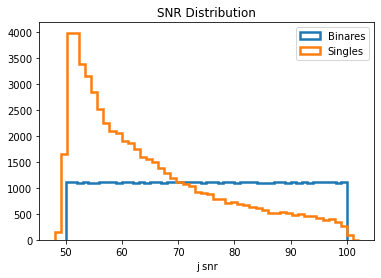

In [21]:
plt.hist(BinDF_mid['J_SNR'],bins=50,lw=2.5, histtype='step', label='Binares')
plt.hist(SinDF_mid['J_SNR'],bins=50,lw=2.5, histtype='step', label='Singles')
plt.legend()
plt.xlabel('j snr')
plt.title('SNR Distribution')

In [22]:
num_class=[]
for i in range(len(BinDF_mid)):
    num_class.append(1)
BinDF_mid["num_class"]=num_class

num_class=[]
for i in range(len(SinDF_mid)):
    num_class.append(0)
SinDF_mid["num_class"]=num_class

DF_mid = pd.concat([SinDF_mid,BinDF_mid],axis=0)
DF_mid.head()

,system_interpolated_flux,system_interpolated_noise,J_SNR,SNR_CLASS,WAVE,SPT,SPT_NUM,flux_0,flux_1,flux_2,...,flux_402,flux_403,flux_404,flux_405,flux_406,flux_407,flux_408,num_class,primary_type,secondary_type
0,"[0.8610309702340423, 0.8270889861132681, 0.919...","[0.019101763188936197, 0.019356779695873207, 0...",100.400423,mid,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...",M6.0,16.0,0.861031,0.827089,0.919178,...,0.220187,0.218119,0.209929,0.224632,0.217142,0.220110,0.223095,0,NaN,NaN
1,"[0.8675019932303866, 0.91173893509264, 0.91233...","[0.017108749353089953, 0.018281688329642293, 0...",100.328013,mid,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...",M6.0,16.0,0.867502,0.911739,0.912335,...,0.221061,0.217430,0.220537,0.222747,0.219491,0.223062,0.212275,0,NaN,NaN
2,"[0.7981778203930247, 0.8534057396993017, 0.887...","[0.024302483121254024, 0.023382202892625947, 0...",100.066550,mid,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...",M6.0,16.0,0.798178,0.853406,0.887686,...,0.206975,0.217803,0.216344,0.244890,0.211070,0.194748,0.204777,0,NaN,NaN
3,"[0.7786710081222503, 0.8886194622846885, 0.876...","[0.020247889507876624, 0.02027735472415288, 0....",99.982114,mid,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...",M6.0,16.0,0.778671,0.888619,0.876761,...,0.236116,0.222329,0.217612,0.229178,0.226154,0.220155,0.223747,0,NaN,NaN
4,"[0.8301487255732912, 0.8403983150121788, 0.871...","[0.020150175935856152, 0.02017949895698997, 0....",99.963024,mid,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...",M6.0,16.0,0.830149,0.840398,0.871887,...,0.232495,0.223055,0.223713,0.218652,0.227840,0.217748,0.221789,0,NaN,NaN


In [23]:
best_model_mid_G1, data_test_mid_G1 = RFclassify(DF_mid, wave, Group='G1')
X_test_mid_G1 = data_test_mid_G1['X_test']
y_test_mid_G1 = data_test_mid_G1['y_test']
test_preds_mid_G1 = best_model_mid_G1.predict(X_test_mid_G1)

The raw features produce a model with precision ~0.9867
{'0': {'precision': 0.9312928625857252, 'recall': 0.9957227238780637, 'f1-score': 0.962430685434918, 'support': 14729}, '1': {'precision': 0.9867480016827934, 'recall': 0.8125757838212367, 'f1-score': 0.8912320699154554, 'support': 5773}, 'accuracy': 0.9441517900692615, 'macro avg': {'precision': 0.9590204321342592, 'recall': 0.9041492538496503, 'f1-score': 0.9268313776751868, 'support': 20502}, 'weighted avg': {'precision': 0.946908047348547, 'recall': 0.9441517900692615, 'f1-score': 0.9423824166126638, 'support': 20502}}


Text(0.5, 0, 'wavelength ($\\mu$m)')

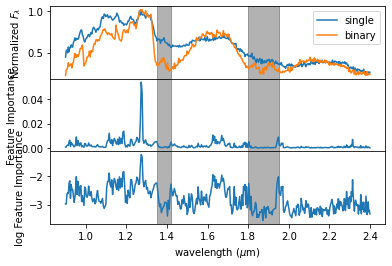

In [24]:
print("The raw features produce a model with precision ~{:.4f}".format(precision_score(y_test_mid_G1, test_preds_mid_G1)))
class_report_mid_G1 = classification_report(y_test_mid_G1,test_preds_mid_G1, digits=4, output_dict=True)
print(class_report_mid_G1)
fig, ax = plt.subplots(3,1,sharex=True)
ax[0].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[1].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[0].axvspan(1.80,1.95, alpha=0.3, color='k')
ax[1].axvspan(1.80,1.95, alpha=0.3, color='k')
ax[2].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[2].axvspan(1.80,1.95, alpha=0.3, color='k')
Sin_i = random.randint(0,len(SinDF_mid))
Bin_i = random.randint(0,len(BinDF_mid))
ax[0].plot(list(wave),list(SinDF_mid.system_interpolated_flux.iloc[Sin_i]),label='single')
ax[0].plot(list(wave),list(BinDF_mid.system_interpolated_flux.iloc[Bin_i]),label='binary')
ax[0].set_ylabel('Normalized $F_\\lambda$')
ax[0].legend()
ax[1].plot(list(wave), list(best_model_mid_G1.feature_importances_)[:409])
ax[1].set_ylabel('Feature Importance')
ax[2].plot(list(wave), np.log10(list(best_model_mid_G1.feature_importances_)[:409]))
ax[2].set_ylabel('log Feature Importance')
plt.subplots_adjust(hspace=0)
# fig.suptitle('Feature importance and M9+L6 binary template')
plt.xlabel('wavelength ($\mu$m)')

In [25]:
best_model_mid_G2, data_test_mid_G2 = RFclassify(DF_mid, wave, Group='G2')
X_test_mid_G2 = data_test_mid_G2['X_test']
y_test_mid_G2 = data_test_mid_G2['y_test']
test_preds_mid_G2 = best_model_mid_G2.predict(X_test_mid_G2)

The raw features produce a model with precision ~0.9984
{'0': {'precision': 0.988894030541416, 'recall': 0.999532273152479, 'f1-score': 0.9941846941149104, 'support': 10690}, '1': {'precision': 0.9984350547730829, 'recall': 0.9637462235649547, 'f1-score': 0.9807840122982321, 'support': 3310}, 'accuracy': 0.9910714285714286, 'macro avg': {'precision': 0.9936645426572495, 'recall': 0.9816392483587169, 'f1-score': 0.9874843532065712, 'support': 14000}, 'weighted avg': {'precision': 0.9911498012704745, 'recall': 0.9910714285714286, 'f1-score': 0.9910163900568244, 'support': 14000}}


Text(0.5, 0, 'wavelength ($\\mu$m)')

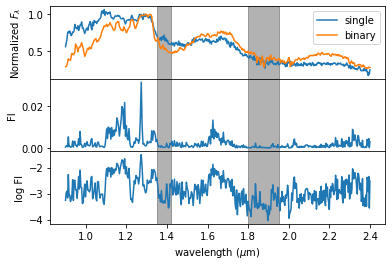

In [29]:
print("The raw features produce a model with precision ~{:.4f}".format(precision_score(y_test_mid_G2, test_preds_mid_G2)))
class_report_mid_G2 = classification_report(y_test_mid_G2,test_preds_mid_G2, digits=4, output_dict=True)
print(class_report_mid_G2)
fig, ax = plt.subplots(3,1,sharex=True)
ax[0].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[1].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[0].axvspan(1.80,1.95, alpha=0.3, color='k')
ax[1].axvspan(1.80,1.95, alpha=0.3, color='k')
ax[2].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[2].axvspan(1.80,1.95, alpha=0.3, color='k')
Sin_i = random.randint(0,len(SinDF_mid))
Bin_i = random.randint(0,len(BinDF_mid))
ax[0].plot(list(wave),list(SinDF_mid.system_interpolated_flux.iloc[Sin_i]),label='single')
ax[0].plot(list(wave),list(BinDF_mid.system_interpolated_flux.iloc[Bin_i]),label='binary')
ax[0].set_ylabel('Normalized $F_\\lambda$')
ax[0].legend()
ax[1].plot(list(wave), list(best_model_mid_G2.feature_importances_)[:409])
ax[1].set_ylabel('FI')
ax[2].plot(list(wave), np.log10(list(best_model_mid_G2.feature_importances_)[:409]))
ax[2].set_ylabel('log FI')
plt.subplots_adjust(hspace=0)
# fig.suptitle('Feature importance and M9+L6 binary template')
plt.xlabel('wavelength ($\mu$m)')

In [27]:
best_model_mid_G3, data_test_mid_G3 = RFclassify(DF_mid, wave, Group='G3')
X_test_mid_G3 = data_test_mid_G3['X_test']
y_test_mid_G3 = data_test_mid_G3['y_test']
test_preds_mid_G3 = best_model_mid_G3.predict(X_test_mid_G3)

The raw features produce a model with precision ~0.9205
{'0': {'precision': 0.9063421433549563, 'recall': 0.9303323794849219, 'f1-score': 0.9181805838424983, 'support': 18172}, '1': {'precision': 0.9205023547880691, 'recall': 0.8935145678410338, 'f1-score': 0.9068077077727258, 'support': 16406}, 'accuracy': 0.912863670541963, 'macro avg': {'precision': 0.9134222490715127, 'recall': 0.9119234736629778, 'f1-score': 0.9124941458076121, 'support': 34578}, 'weighted avg': {'precision': 0.9130606472814891, 'recall': 0.912863670541963, 'f1-score': 0.9127845688965591, 'support': 34578}}


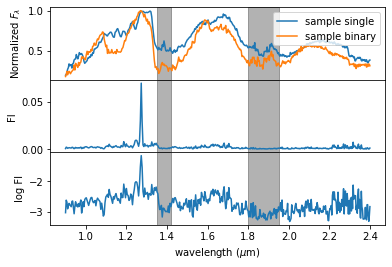

In [33]:
print("The raw features produce a model with precision ~{:.4f}".format(precision_score(y_test_mid_G3, test_preds_mid_G3)))
class_report_mid_G3 = classification_report(y_test_mid_G3,test_preds_mid_G3, digits=4, output_dict=True)
print(class_report_mid_G3)
fig, ax = plt.subplots(3,1,sharex=True)
ax[0].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[1].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[0].axvspan(1.80,1.95, alpha=0.3, color='k')
ax[1].axvspan(1.80,1.95, alpha=0.3, color='k')
ax[2].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[2].axvspan(1.80,1.95, alpha=0.3, color='k')
Sin_i = random.randint(0,len(SinDF_mid))
Bin_i = random.randint(0,len(BinDF_mid))
ax[0].plot(list(wave),list(SinDF_mid.system_interpolated_flux.iloc[Sin_i]),label='sample single')
ax[0].plot(list(wave),list(BinDF_mid.system_interpolated_flux.iloc[Bin_i]),label='sample binary')
ax[0].set_ylabel('Normalized $F_\\lambda$')
ax[0].legend()
ax[1].plot(list(wave), list(best_model_mid_G3.feature_importances_)[:409])
ax[1].set_ylabel('FI')
ax[2].plot(list(wave), np.log10(list(best_model_mid_G3.feature_importances_)[:409]))
ax[2].set_ylabel('log FI')
plt.subplots_adjust(hspace=0)
# fig.suptitle('Feature importance and M9+L6 binary template')
plt.xlabel('wavelength ($\mu$m)')
plt.savefig('paperfigures/FIplot',facecolor='white')

In [28]:
best_model_mid_G4, data_test_mid_G4 = RFclassify(DF_mid, wave, Group='G4')
X_test_mid_G4 = data_test_mid_G4['X_test']
y_test_mid_G4 = data_test_mid_G4['y_test']
test_preds_mid_G4 = best_model_mid_G4.predict(X_test_mid_G4)

In [50]:
joblib.dump(best_model_mid_G1, r"RFclassifiers/RF_mid_G1.joblib")
joblib.dump(best_model_mid_G2, r"RFclassifiers/RF_mid_G2.joblib")
joblib.dump(best_model_mid_G3, r"RFclassifiers/RF_mid_G3.joblib")
joblib.dump(best_model_mid_G4, r"RFclassifiers/RF_mid_G4.joblib")
# joblib.dump(best_model_mid_T_G1, r"RFclassifiers/RF_mid_T_G1.joblib")
# joblib.dump(best_model_mid_T_G2, r"RFclassifiers/RF_mid_T_G2.joblib")
# joblib.dump(best_model_mid_T_G3, r"RFclassifiers/RF_mid_T_G3.joblib")
# joblib.dump(best_model_mid_T_G4, r"RFclassifiers/RF_mid_T_G4.joblib")

['RFclassifiers/RF_mid_G4.joblib']

HIG SNR

In [51]:
with open('data/BinDF_hig.pickle', 'rb') as f:
        BinDF_hig = pickle.load(f)
# BinDF_hig.drop(['primary_type','secondary_type'],axis=1,inplace=True)

In [52]:
(len(BinDF_hig)-len(SinDF_hig))

-15330

Text(0.5, 1.0, 'SNR Distribution')

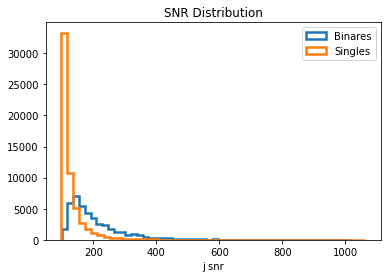

In [69]:
plt.hist(BinDF_hig['J_SNR'],bins=50,lw=2.5, histtype='step', label='Binares')
plt.hist(SinDF_hig['J_SNR'],bins=50,lw=2.5, histtype='step', label='Singles')
plt.legend()
plt.xlabel('j snr')
plt.title('SNR Distribution')

In [53]:
num_class=[]
for i in range(len(BinDF_hig)):
    num_class.append(1)
BinDF_hig["num_class"]=num_class

num_class=[]
for i in range(len(SinDF_hig)):
    num_class.append(0)
SinDF_hig["num_class"]=num_class

DF_hig = pd.concat([SinDF_hig,BinDF_hig],axis=0)
DF_hig.head()

,system_interpolated_flux,system_interpolated_noise,J_SNR,SNR_CLASS,WAVE,SPT,SPT_NUM,flux_0,flux_1,flux_2,...,flux_402,flux_403,flux_404,flux_405,flux_406,flux_407,flux_408,num_class,primary_type,secondary_type
0,"[0.7265927080223364, 0.7617387019366572, 0.794...","[0.0022733376353015347, 0.002317339280722625, ...",855.886978,hig,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...",M6.0,16.0,0.726593,0.761739,0.794943,...,0.234334,0.227850,0.224349,0.226685,0.227949,0.227389,0.225762,0,NaN,NaN
1,"[0.7288409133874643, 0.7589000995254457, 0.796...","[0.0025764536210179847, 0.002626322235743523, ...",753.814725,hig,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...",M6.0,16.0,0.728841,0.758900,0.796008,...,0.233228,0.227914,0.224111,0.225528,0.228974,0.228057,0.225411,0,NaN,NaN
2,"[0.7319081708855486, 0.7588069089958512, 0.794...","[0.0026452051567653775, 0.002696404493619972, ...",737.335562,hig,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...",M6.0,16.0,0.731908,0.758807,0.794084,...,0.236095,0.227286,0.225476,0.226031,0.228366,0.227662,0.227371,0,NaN,NaN
3,"[0.7236000532061864, 0.7610460552635769, 0.795...","[0.002638733481669213, 0.0026898075558490337, ...",736.306641,hig,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...",M6.0,16.0,0.723600,0.761046,0.795902,...,0.233484,0.227091,0.225135,0.227858,0.226822,0.227336,0.226070,0,NaN,NaN
4,"[0.7240429872910842, 0.7685775481087592, 0.790...","[0.0027209802581784873, 0.0027736462619691107,...",713.323942,hig,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...",M6.0,16.0,0.724043,0.768578,0.790617,...,0.233153,0.227295,0.223572,0.226104,0.227036,0.227532,0.225032,0,NaN,NaN


In [54]:
best_model_hig_G1, data_test_hig_G1 = RFclassify(DF_hig, wave, Group='G1')
X_test_hig_G1 = data_test_hig_G1['X_test']
y_test_hig_G1 = data_test_hig_G1['y_test']
test_preds_hig_G1 = best_model_hig_G1.predict(X_test_hig_G1)

The raw features produce a model with precision ~0.9969
{'0': {'precision': 0.9512621359223301, 'recall': 0.9993880048959608, 'f1-score': 0.9747313967369678, 'support': 14706}, '1': {'precision': 0.9968879668049793, 'recall': 0.7929042904290429, 'f1-score': 0.8832720588235293, 'support': 3636}, 'accuracy': 0.9584560026169447, 'macro avg': {'precision': 0.9740750513636547, 'recall': 0.8961461476625019, 'f1-score': 0.9290017277802486, 'support': 18342}, 'weighted avg': {'precision': 0.9603067069118248, 'recall': 0.9584560026169447, 'f1-score': 0.9566010863753245, 'support': 18342}}


Text(0.5, 0, 'wavelength ($\\mu$m)')

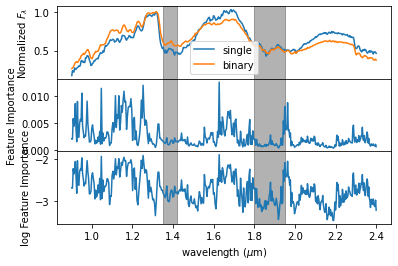

In [60]:
print("The raw features produce a model with precision ~{:.4f}".format(precision_score(y_test_hig_G1, test_preds_hig_G1)))
class_report_hig_G1 = classification_report(y_test_hig_G1,test_preds_hig_G1, digits=4, output_dict=True)
print(class_report_hig_G1)
fig, ax = plt.subplots(3,1,sharex=True)
ax[0].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[1].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[0].axvspan(1.80,1.95, alpha=0.3, color='k')
ax[1].axvspan(1.80,1.95, alpha=0.3, color='k')
ax[2].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[2].axvspan(1.80,1.95, alpha=0.3, color='k')
Sin_i = random.randint(0,len(SinDF_hig))
Bin_i = random.randint(0,len(BinDF_hig))
ax[0].plot(list(wave),list(SinDF_hig.system_interpolated_flux.iloc[Sin_i]),label='single')
ax[0].plot(list(wave),list(BinDF_hig.system_interpolated_flux.iloc[Bin_i]),label='binary')
ax[0].set_ylabel('Normalized $F_\\lambda$')
ax[0].legend()
ax[1].plot(list(wave), list(best_model_hig_G1.feature_importances_)[:409])
ax[1].set_ylabel('Feature Importance')
ax[2].plot(list(wave), np.log10(list(best_model_hig_G1.feature_importances_)[:409]))
ax[2].set_ylabel('log Feature Importance')
plt.subplots_adjust(hspace=0)
# fig.suptitle('Feature importance and M9+L6 binary template')
plt.xlabel('wavelength ($\mu$m)')

In [55]:
best_model_hig_G2, data_test_hig_G2 = RFclassify(DF_hig, wave, Group='G2')
X_test_hig_G2 = data_test_hig_G2['X_test']
y_test_hig_G2 = data_test_hig_G2['y_test']
test_preds_hig_G2 = best_model_hig_G2.predict(X_test_hig_G2)

The raw features produce a model with precision ~1.0000
{'0': {'precision': 0.9978403755868545, 'recall': 1.0, 'f1-score': 0.9989190205386097, 'support': 10627}, '1': {'precision': 1.0, 'recall': 0.9881626351003603, 'f1-score': 0.9940460781775822, 'support': 1943}, 'accuracy': 0.9981702466189339, 'macro avg': {'precision': 0.9989201877934273, 'recall': 0.9940813175501801, 'f1-score': 0.996482549358096, 'support': 12570}, 'weighted avg': {'precision': 0.9981741981990058, 'recall': 0.9981702466189339, 'f1-score': 0.9981657884775536, 'support': 12570}}


Text(0.5, 0, 'wavelength ($\\mu$m)')

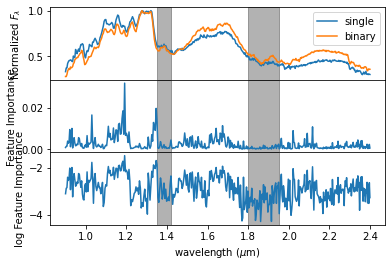

In [59]:
print("The raw features produce a model with precision ~{:.4f}".format(precision_score(y_test_hig_G2, test_preds_hig_G2)))
class_report_hig_G2 = classification_report(y_test_hig_G2,test_preds_hig_G2, digits=4, output_dict=True)
print(class_report_hig_G2)
fig, ax = plt.subplots(3,1,sharex=True)
ax[0].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[1].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[0].axvspan(1.80,1.95, alpha=0.3, color='k')
ax[1].axvspan(1.80,1.95, alpha=0.3, color='k')
ax[2].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[2].axvspan(1.80,1.95, alpha=0.3, color='k')
Sin_i = random.randint(0,len(SinDF_hig))
Bin_i = random.randint(0,len(BinDF_hig))
ax[0].plot(list(wave),list(SinDF_hig.system_interpolated_flux.iloc[Sin_i]),label='single')
ax[0].plot(list(wave),list(BinDF_hig.system_interpolated_flux.iloc[Bin_i]),label='binary')
ax[0].set_ylabel('Normalized $F_\\lambda$')
ax[0].legend()
ax[1].plot(list(wave), list(best_model_hig_G2.feature_importances_)[:409])
ax[1].set_ylabel('Feature Importance')
ax[2].plot(list(wave), np.log10(list(best_model_hig_G2.feature_importances_)[:409]))
ax[2].set_ylabel('log Feature Importance')
plt.subplots_adjust(hspace=0)
# fig.suptitle('Feature importance and M9+L6 binary template')
plt.xlabel('wavelength ($\mu$m)')

In [56]:
best_model_hig_G3, data_test_hig_G3 = RFclassify(DF_hig, wave, Group='G3')
X_test_hig_G3 = data_test_hig_G3['X_test']
y_test_hig_G3 = data_test_hig_G3['y_test']
test_preds_hig_G3 = best_model_hig_G3.predict(X_test_hig_G3)

In [57]:
best_model_hig_G4, data_test_hig_G4 = RFclassify(DF_hig, wave, Group='G4')
X_test_hig_G4 = data_test_hig_G4['X_test']
y_test_hig_G4 = data_test_hig_G4['y_test']
test_preds_hig_G4 = best_model_hig_G4.predict(X_test_hig_G4)

In [58]:
joblib.dump(best_model_hig_G1, r"RFclassifiers/RF_hig_G1.joblib")
joblib.dump(best_model_hig_G2, r"RFclassifiers/RF_hig_G2.joblib")
joblib.dump(best_model_hig_G3, r"RFclassifiers/RF_hig_G3.joblib")
joblib.dump(best_model_hig_G4, r"RFclassifiers/RF_hig_G4.joblib")
# joblib.dump(best_model_hig_T_G1, r"RFclassifiers/RF_hig_T_G1.joblib")
# joblib.dump(best_model_hig_T_G2, r"RFclassifiers/RF_hig_T_G2.joblib")
# joblib.dump(best_model_hig_T_G3, r"RFclassifiers/RF_hig_T_G3.joblib")
# joblib.dump(best_model_hig_T_G4, r"RFclassifiers/RF_hig_T_G4.joblib")

['RFclassifiers/RF_hig_G4.joblib']